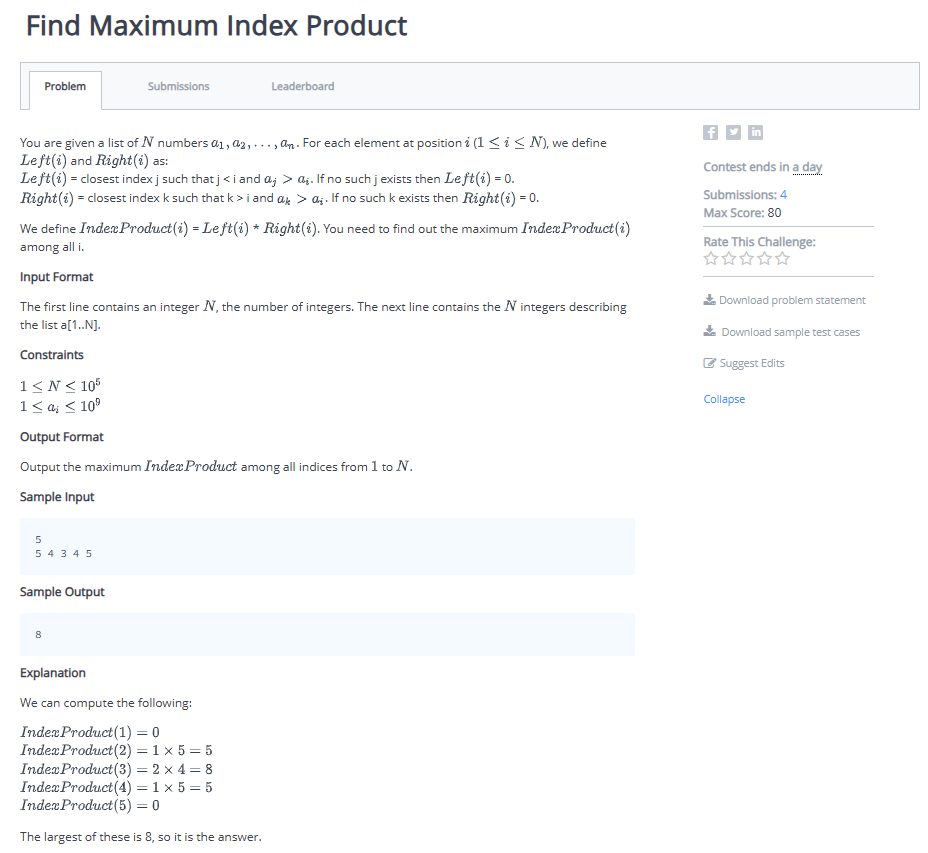

##### 1st approach => correct but gave Status: Terminated due to timeout

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys

#
# Complete the 'solve' function below.
# The function is expected to return an INTEGER.
# The function accepts INTEGER_ARRAY arr as parameter.
#

def solve(arr):
    # Write your code here
    prod_arr = []
    for i in range(0, len(arr)):
        left = 0
        right = 0
        # left
        j = i-1     # 1 i.e 5       when i=2 ie 4
        while j >= 0:
            if arr[j] > arr[i]:
                left = j + 1
                break
            j = j-1
        # right
        j = i+1
        while j < len(arr):
            if arr[j] > arr[i]:
                right = j+1
                break
            j = j+1
        indexProduct = left * right
        prod_arr.append(indexProduct)
    print(prod_arr)
    return max(prod_arr)
        

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    arr_count = int(input().strip())

    arr = list(map(int, input().rstrip().split()))

    result = solve(arr)

    fptr.write(str(result) + '\n')

    fptr.close()


------------------

==============

------------

##### 2nd approach => 
Yeah, your brute-force approach is too slow for large inputs (
𝑁 ≤ 10^6). Since your time complexity is O(N^2), it leads to a timeout when N is large.

🔍 Why is it Timing Out?
Your nested loops for finding Left(i) and Right(i) iterate through the array multiple times, making the worst-case scenario 1,000,000 × 1,000,000 = 10¹² operations, which is far too slow.

✅ How to Fix It?
You must use an O(N) approach instead of brute force.
The best way to do this is by using monotonic stacks to find Left(i) and Right(i) efficiently.

In [ ]:
#!/bin/python3

import math
import os
import random
import re
import sys

#
# Complete the 'solve' function below.
#
# The function is expected to return an INTEGER.
# The function accepts INTEGER_ARRAY arr as parameter.
#

def solve(arr):
    n = len(arr)
    left = [0] * n
    right = [0] * n

    # left
    stack = []
    for i in range(n):
        while stack and arr[stack[-1]] <= arr[i]:
            stack.pop()
        if stack:
            left[i] = stack[-1] + 1  
        stack.append(i)

    # right
    stack2 = []
    for i in range(n-1, -1, -1):
        while stack2 and arr[stack2[-1]] <= arr[i]:
            stack2.pop()
        if stack2:
            right[i] = stack2[-1] + 1  
        stack2.append(i)

    max_product = 0
    for i in range(n):
        max_product = max(max_product, left[i]*right[i])
    return max_product
        

if __name__ == '__main__':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')

    arr_count = int(input().strip())

    arr = list(map(int, input().rstrip().split()))

    result = solve(arr)

    fptr.write(str(result) + '\n')

    fptr.close()